**<h1>Jeden</h1>**

Niestety podczas przypisywania zdjęć do poszczególnych kategorii, odkryłeś coś strasznego. Marek Adamczyk od zawsze był fanatykiem cyfry 1, i miał on dziesiątki tysięcy jej zdjęć na swoim telefonie, a teraz nagle jest ich tylko jakoś 5000. Podejrzewasz, że gdy robił zdjęcia podczas swych przygód, musiał nadpisać swoją kolekcję. Wiesz, że jeśli zauważy co się stało, popadnie w rozpacz, a ty nigdy nie zobaczysz swoich pieniędzy. Korzystając z zdjęć dostępnych na jego telefonie, wygeneruj kolejne na tyle podobne, aby nie zauważył różnicy, i był szczęśliwy z swoją kolekcją zdjęć

Twoim zadaniem jest stworzenie systemu, który potrafi **generować nowe obrazy cyfry „1”**, bazując na danych MNIST. Obrazy te mają przypominać cyfrę „1” z MNIST, ale nie mogą być jej kopiami – muszą być **nowe**, wygenerowane na podstawie specyficznych reguł.

---

## Wyjaśnienie pojęć:

- **MNIST**: To zbiór danych zawierający ręcznie pisane cyfry (od 0 do 9) zapisane jako obrazy o rozdzielczości $28 \times 28$ pikseli. Każdy obraz to tak naprawdę wektor w przestrzeni $\mathbb{R}^{784}$, gdzie każda liczba odpowiada jasności konkretnego piksela.

- **Embedding ($\phi$)**:
  - Embedding to przekształcenie danych (tu: obrazów cyfry „1”) z ich oryginalnej postaci ($\mathbb{R}^{784}$) do bardziej zrozumiałej przestrzeni o niższym wymiarze (w tym przypadku $\mathbb{R}^3$).
  - Funkcja $\phi$ przypisuje każdemu obrazowi $x \in \mathbb{R}^{784}$ punkt w przestrzeni trójwymiarowej:

    $\phi : \mathbb{R}^{784} \to \mathbb{R}^3$
    
    Przykład: jeśli masz obraz $x_1$, to embedding $\phi(x_1)$ będzie punktem w przestrzeni $\mathbb{R}^3$, np. $(1.5, -2.3, 0.7)$.

- **Parametr ($\epsilon$)**:
  - To średnia odległość od każdego punktu w embeddingu $\phi(X^{1}_{mnist})$ do jego najbliższego sąsiada. Mówiąc prościej, $\epsilon$ określa, jak "gęsto" punkty są rozmieszczone w przestrzeni 3D:
  
    $$
    \Large \epsilon = \frac{1}{|X^{1}_{mnist}|} \sum_{x \in X^{1}_{mnist}} \min_{y \in X^{1}_{mnist} \setminus \{x\}} ||\phi(x) - \phi(y)||
    $$
---

## Kroki do wykonania

### 1. Przygotowanie danych
- Weź wyłącznie obrazy cyfry „1” z MNIST i oznacz ten zbiór jako $X^{1}_{mnist}$.
- Obrazy w tym zbiorze stanowią podstawę dla generacji nowych danych.

---

### 2. Przekształcenie danych do przestrzeni 3D (embedding $\phi$)
- Użyj algorytmu **t-SNE**, aby przekształcić obrazy $X^{1}_{mnist}$ z przestrzeni $\mathbb{R}^{784}$ (oryginalny format obrazów) do przestrzeni $\mathbb{R}^3$.
- Wyniki embeddingu to punkty $\phi(x)$ w przestrzeni 3D:

  $\phi(x) \in \mathbb{R}^3$

- Wyświetl chmurę punktów $\phi(X^{1}_{mnist})$ na wykresie 3D, aby zobaczyć ich rozmieszczenie.

---

### 3. Nauka odwzorowania z przestrzeni 3D na obrazy
- Zbuduj sieć neuronową, która nauczy się przekształcać punkty $\phi(x)$ z przestrzeni 3D z powrotem na odpowiadające im obrazy $x \in \mathbb{R}^{784}$:

  $\phi^{-1} : \mathbb{R}^3 \to \mathbb{R}^{784}$

- Sieć neuronowa ma przyjmować punkt $z \in \mathbb{R}^3$ i generować obraz $x \in \mathbb{R}^{784}$ (czyli obraz $28 \times 28$).
- **Ograniczenie**: Możesz używać tylko warstw gęstych (dense), żadnych warstw konwolucyjnych.

---

### 4. Generowanie nowych punktów w przestrzeni 3D
Aby wygenerować nowe obrazy, musisz najpierw stworzyć **losowe punkty $z_{\text{random}}$** w przestrzeni 3D. Masz dwa sposoby:

#### 4.1. Losowanie z rozkładu normalnego:
- Wybierz losowy punkt $\phi(x)$ z embeddingu $\phi(X^{1}_{mnist})$.
- Wygeneruj nowy punkt $z_{\text{random}}$ z rozkładu:

  $z_{\text{random}} \sim \mathcal{N}(\phi(x), \epsilon \cdot I)$
  
  gdzie:
  - $\mathcal{N}$ oznacza rozkład normalny,
  - $\phi(x)$ to wybrany punkt w embeddingu,
  - $\epsilon$ to średnia odległość do najbliższego sąsiada w $\phi(X^{1}_{mnist})$,
  - $I$ to macierz jednostkowa ($3 \times 3$).

#### 4.2. Losowanie z granic chmury punktów:
- Wybierz sześcian obejmujący całą chmurę punktów $\phi(X^{1}_{mnist})$, np. $[-20, 20] \times [-20, 20] \times [-20, 20]$.
- Generuj losowy punkt $z_{\text{random}}$ w tym sześcianie.
- Sprawdzaj odległość $d$ tego punktu do najbliższego punktu w $\phi(X^{1}_{mnist})$:
  $d = \min_{y \in \phi(X^{1}_{mnist})} ||z_{\text{random}} - y||$
- Jeśli $d \leq \epsilon$, akceptujesz punkt $z_{\text{random}}$. W przeciwnym razie go odrzucasz i próbujesz ponownie.

---

### 5. Generowanie obrazów
- Przekształć nowe punkty $z_{\text{random}}$ z przestrzeni 3D z powrotem na obrazy $x \in \mathbb{R}^{784}$, używając swojej sieci neuronowej $\phi^{-1}$.
- Wygenerowane obrazy powinny przypominać cyfry „1”, ale **nie mogą być identyczne** z obrazami w $X^{1}_{mnist}$.

---

### 6. Ocena jakości
- Oceń wygenerowane obrazy za pomocą klasyfikatora $k$-NN ($k = 3$):
  - Klasyfikator $k$-NN złożony z:
    - **Pierwszych 5,000 punktach z MNISTa** (klasy „1”) z zbioru treningowego,
    - **5,000 punktach wygenerowanych** przez Twój model $\phi^{-1}$.
  - **Accuracy (dokładność)** klasyfikatora należy sprawdzić na osobnym zbiorze testowym, który składa się z:
    - **Pierwszych 1,000 punktów z MNISTa** (klasy „1”) z zbioru testowego,
    - **1,000 punktów wygenerowanych** przez Twój model $\phi^{-1}$.

---
# <h2>Ocenanie</h2>

Ocena zależy od wartości F1-score w sposób liniowy, przy czym:

Wzór na obliczenie punktów (P):

$$ P = \frac{1-F1}{0.5} $$

Gdzie:
- `F1` to wartość F1-score modelu KNN (od 0 do 1).
- Jeśli `F1 <= 0.5`, to P = 1.

# <h2>Ograniczenia</h2>

1. Możesz skorzystać z gotowych implementacji t-SNE oraz KNN
2. Czas treningu i ewaluacji na GPU T4 w Google Colab powinien wynosić maksymalnie 15 minut.

<h2>Rozwiązanie</h2>

- W tym zadaniu musisz musisz dołączyć plik Zadanie.ipynb, który po włączeniu wykona wszystkie kroki polecenia, i w ostatniej komórce wyświetli accuracy.


In [74]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

In [75]:
def set_seed(seed: int):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)

set_seed(42)

#Data preparing

In [76]:
transform = transforms.Compose([transforms.ToTensor()])
mnist_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
indices = [i for i, label in enumerate(mnist_dataset.targets) if label == 1]
filtered_data = torch.utils.data.Subset(mnist_dataset, indices)

images = torch.stack([filtered_data[i][0].view(-1) for i in range(len(filtered_data))])
labels = torch.tensor([1] * len(filtered_data))

tsne = TSNE(n_components=3, random_state=42, perplexity=30, max_iter=1000)
reduced_features = tsne.fit_transform(images)
reduced_train_data = torch.tensor(reduced_features, dtype=torch.float32)

#Datasets

In [77]:
class TSNEDataset(torch.utils.data.Dataset):
    def __init__(self, reduced_features, original_images):
        self.reduced_features = reduced_features
        self.original_images = original_images

    def __len__(self):
        return len(self.reduced_features)

    def __getitem__(self, idx):
        return self.reduced_features[idx], self.original_images[idx]

class Decoder(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Decoder, self).__init__()
        self.decoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.decoder(x)

#Preparing Data

In [78]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

custom_dataset = TSNEDataset(reduced_train_data, images)
data_loader = torch.utils.data.DataLoader(custom_dataset, batch_size=64, shuffle=True)

input_dim = reduced_train_data.size(1)
output_dim = images.size(1)
decoder = Decoder(input_dim, output_dim).to(device)

reduced_train_data = reduced_train_data.to(device)
images = images.to(device)


Using device: cuda


#Training

In [85]:
criterion = nn.MSELoss()
optimizer = optim.Adam(decoder.parameters(), lr=0.001)
epochs = 30

for epoch in range(epochs):
    total_loss = 0
    for reduced, original in data_loader:
        reduced, original = reduced.to(device), original.to(device)
        optimizer.zero_grad()
        reconstructed = decoder(reduced)
        loss = criterion(reconstructed, original)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(data_loader):.6f}")

Epoch 1/30, Loss: 0.006867
Epoch 2/30, Loss: 0.006570
Epoch 3/30, Loss: 0.006439
Epoch 4/30, Loss: 0.006313
Epoch 5/30, Loss: 0.006191
Epoch 6/30, Loss: 0.006113
Epoch 7/30, Loss: 0.006060
Epoch 8/30, Loss: 0.005986
Epoch 9/30, Loss: 0.005935
Epoch 10/30, Loss: 0.005878
Epoch 11/30, Loss: 0.005839
Epoch 12/30, Loss: 0.005793
Epoch 13/30, Loss: 0.005739
Epoch 14/30, Loss: 0.005718
Epoch 15/30, Loss: 0.005679
Epoch 16/30, Loss: 0.005631
Epoch 17/30, Loss: 0.005581
Epoch 18/30, Loss: 0.005525
Epoch 19/30, Loss: 0.005514
Epoch 20/30, Loss: 0.005479
Epoch 21/30, Loss: 0.005439
Epoch 22/30, Loss: 0.005431
Epoch 23/30, Loss: 0.005416
Epoch 24/30, Loss: 0.005375
Epoch 25/30, Loss: 0.005350
Epoch 26/30, Loss: 0.005327
Epoch 27/30, Loss: 0.005290
Epoch 28/30, Loss: 0.005281
Epoch 29/30, Loss: 0.005227
Epoch 30/30, Loss: 0.005246


#Display of Generated Img

In [87]:
reduced_max = torch.max(reduced_train_data, dim=0)[0]
reduced_min = torch.min(reduced_train_data, dim=0)[0]

n = 5

to_generate = tensor = torch.stack([
    torch.FloatTensor(n).uniform_(reduced_min[0], reduced_max[0]),
    torch.FloatTensor(n).uniform_(reduced_min[1], reduced_max[1]),
    torch.FloatTensor(n).uniform_(reduced_min[2], reduced_max[2])
], dim=1).to(device)

In [88]:
generated_samples = decoder(to_generate)
print(generated_samples.shape)

torch.Size([5, 784])


In [89]:
def display_reconstructed(reconstructed_tensor, title="Reconstructed Tensor"):

    tensor_np = reconstructed_tensor.detach().cpu().numpy()

    if len(tensor_np.shape) == 3 and tensor_np.shape[-1] == 3:
        plt.imshow(tensor_np)
    else:
        plt.imshow(tensor_np, cmap="gray")

    plt.title(title)
    plt.axis("off")

    plt.show()

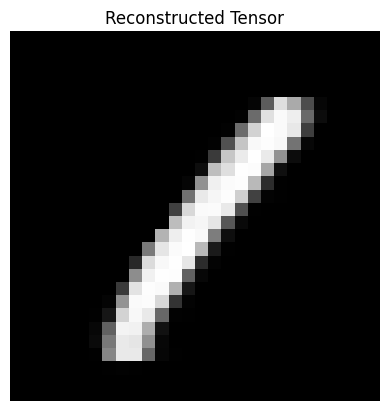

In [96]:
display_reconstructed(generated_samples[2].reshape(28,28))

#Validate with knn classifier

In [95]:
n_generated_train = 5000
n_generated_test = 1000

reduced_max = torch.max(reduced_train_data, dim=0)[0]
reduced_min = torch.min(reduced_train_data, dim=0)[0]

decoder.eval()

with torch.no_grad():
    generated_train_reduced = torch.stack([
        torch.FloatTensor(n_generated_train).uniform_(reduced_min[0], reduced_max[0]),
        torch.FloatTensor(n_generated_train).uniform_(reduced_min[1], reduced_max[1]),
        torch.FloatTensor(n_generated_train).uniform_(reduced_min[2], reduced_max[2])
    ], dim=1).to(device)
    generated_train_images = decoder(generated_train_reduced).view(n_generated_train, -1)
    generated_train_labels = torch.zeros((n_generated_train,))

with torch.no_grad():
    generated_test_reduced = torch.stack([
        torch.FloatTensor(n_generated_test).uniform_(reduced_min[0], reduced_max[0]),
        torch.FloatTensor(n_generated_test).uniform_(reduced_min[1], reduced_max[1]),
        torch.FloatTensor(n_generated_test).uniform_(reduced_min[2], reduced_max[2])
    ], dim=1).to(device)
    generated_test_images = decoder(generated_test_reduced).view(n_generated_test, -1)
    generated_test_labels = torch.zeros((n_generated_test,))

combined_train_images = torch.cat([images[:n_generated_train], generated_train_images], dim=0).cpu()
combined_train_labels = torch.cat([labels[:n_generated_train], generated_train_labels], dim=0).cpu()

combined_test_images = torch.cat([images[n_generated_train:n_generated_train+n_generated_test], generated_test_images], dim=0).cpu()
combined_test_labels = torch.cat([labels[n_generated_train:n_generated_train+n_generated_test], generated_test_labels], dim=0).cpu()

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(combined_train_images.numpy(), combined_train_labels.numpy())

predictions = knn.predict(combined_test_images.numpy())
accuracy = f1_score(combined_test_labels.numpy(), predictions)

print(combined_test_labels.shape)
print(combined_test_labels[:10])
print(combined_test_labels[-10:])

print(f"KNN Classifier Accuracy: {accuracy * 100:.2f}%")

torch.Size([2000])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
KNN Classifier Accuracy: 44.60%
